In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
def get_data(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    x = np.array([np.append(1, row) for row in data[:, :-1]])
    y = np.array([1 if label >= 7 else 0 for label in data[:, -1]])
    return x, y


def standardize(data):
    mean = np.mean(data[:, 1:], axis=0)
    std_dev = np.std(data[:, 1:], axis=0)
    z = np.array([(row - mean) / std_dev for row in data[:, 1:]])

    return np.column_stack((data[:, 0], z))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def threshold(a):
    if a >= 0.5:
        return 1
    else:
        return 0


def cost_function(data, labels, weights):
    m = len(labels)
    h_x = sigmoid(np.dot(data, weights))
    cost = np.dot(-labels, np.log(h_x)) - np.dot((1 - labels), np.log(1 - h_x))
    return cost / m


def gradient(data, labels, weights):
    m = len(labels)
    h_x = sigmoid(np.dot(data, weights))
    grads = np.zeros(shape=weights.shape)
    for i, grad in enumerate(grads):
        grads[i] = np.sum((h_x - labels).dot(data[:, i])) / m

    return grads


def BGD(data, labels, learning_rate, epochs):
    J = []
    thetas = np.zeros(shape=data[0].shape)
    for _ in range(epochs):
        thetas[:] -= learning_rate * gradient(data=data, labels=labels, weights=thetas)
        J.append(cost_function(data=data, labels=labels, weights=thetas))

    return J, thetas


def plot_error(error):
    sns.set_style(style='darkgrid')
    plt.plot(error)
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("Cost Function")
    plt.show()


def predict(x, y, weights):
    count = 0
    preds = [threshold(sigmoid(np.dot(row, weights))) for row in x]
    for i in range(len(preds)):
        if preds[i] == y[i]:
            count += 1

    return preds, count


def RMSE(predictions, actual):
    rmse = np.sum(np.square(predictions - actual)) / len(actual)
    return np.sqrt(rmse)

In [3]:
def main():
    X, y = get_data(file_path='./winequality-red.csv')
    std_X = standardize(data=X)
    x_train, x_test, y_train, y_test = train_test_split(std_X, y, test_size=0.2, shuffle=True, random_state=42)
    J, thetas = BGD(data=x_train, labels=y_train, learning_rate=0.01, epochs=5000)
    plot_error(error=J)
    predictions, correct_nums = predict(x=x_test, y=y_test, weights=thetas)
    print("Accuracy: {}".format((correct_nums / len(y_test)) * 100))
    print("RMSE: {}".format(RMSE(predictions=predictions, actual=y_test)))

    tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=predictions, labels=[0, 1]).ravel()
    print(f"\nTrue Negatives: {tn}\nTrue Positives: {tp}\nFalse Negative: {fn}\nFalse Positive: {fp}")
    sns.heatmap(confusion_matrix(predictions, y_test), robust=True, annot=True)
    plt.show()

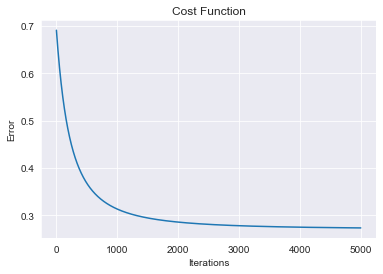

Accuracy: 86.875
RMSE: 0.362284418654736

True Negatives: 265
True Positives: 13
False Negative: 34
False Positive: 8


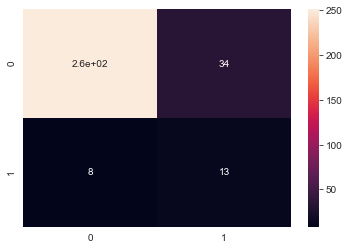

In [4]:
if __name__ == '__main__':
    main()